In [20]:
import pandas as pd

pd.set_option("display.width", 2000)      # Breite des Outputs vergrößern
pd.set_option("display.max_columns", None)# zeigt alle Spalten vollständig
pd.set_option("display.max_rows", None)   # (optional) zeigt alle Zeilen

# Blatt 5
## Nr.1
### a)

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Input/rawdata_luftqualitaet.csv")

df.head()


,humidity_inside,temperature_inside,co2_inside,temperature_heater,temperature_wall_inside,state_air_quality
0,58.94,21.955,1653,41.187,14.062,1
1,58.97,21.940,1665,40.937,14.062,1
2,57.89,22.353,1707,40.375,14.250,1
3,58.96,22.504,1981,40.875,14.375,1
4,57.74,22.515,1868,40.812,14.375,1




### Statistische Werte

In [22]:
print("Min:\n", df.min())
print("\nMax:\n", df.max())
print("\nMean:\n", df.mean())
print("\nStd:\n", df.std())
print("\nCount:\n", df.count())

Min:
 humidity_inside             34.120
temperature_inside          17.194
co2_inside                 395.000
temperature_heater          16.687
temperature_wall_inside      8.812
state_air_quality            0.000
dtype: float64

Max:
 humidity_inside              75.510
temperature_inside           27.613
co2_inside                 5544.000
temperature_heater           52.625
temperature_wall_inside      15.750
state_air_quality             2.000
dtype: float64

Mean:
 humidity_inside              51.598799
temperature_inside           22.103834
co2_inside                 1381.217249
temperature_heater           40.034884
temperature_wall_inside      12.482422
state_air_quality             1.085153
dtype: float64

Std:
 humidity_inside              6.706102
temperature_inside           1.457741
co2_inside                 588.854522
temperature_heater           7.383326
temperature_wall_inside      1.421408
state_air_quality            0.422532
dtype: float64

Count:
 humidity_inside

### Liniendiagramm

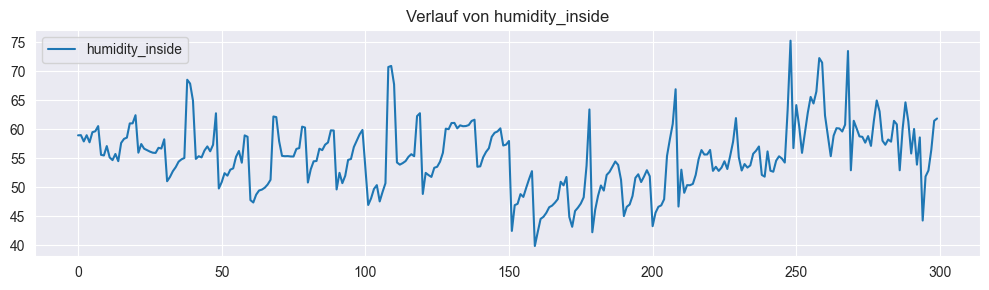

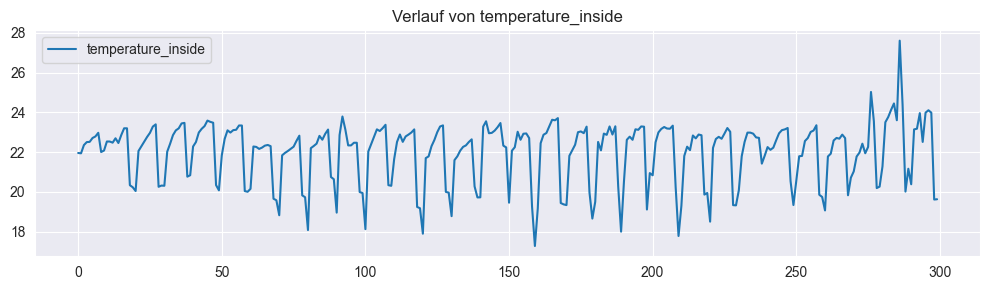

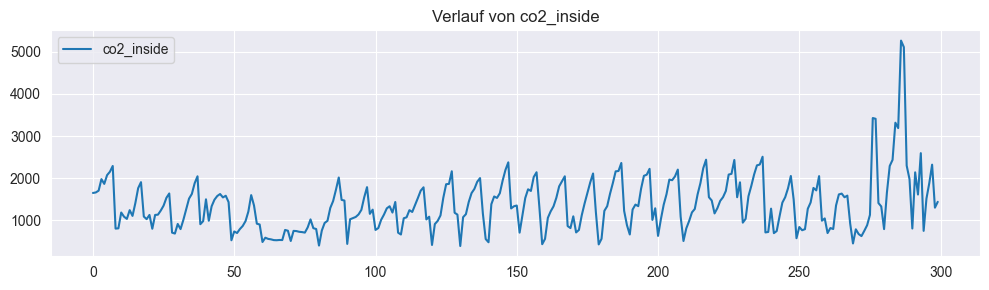

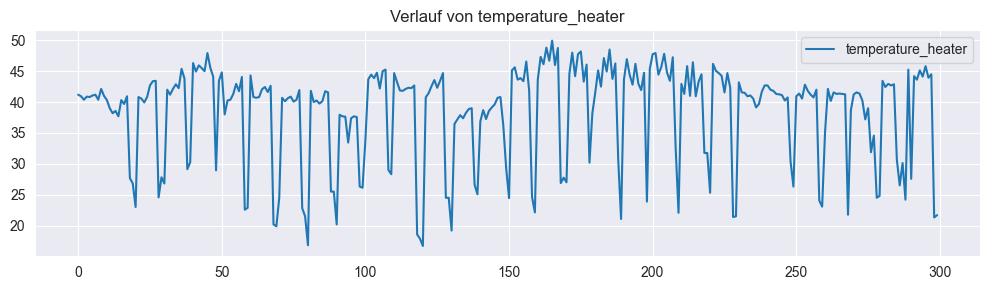

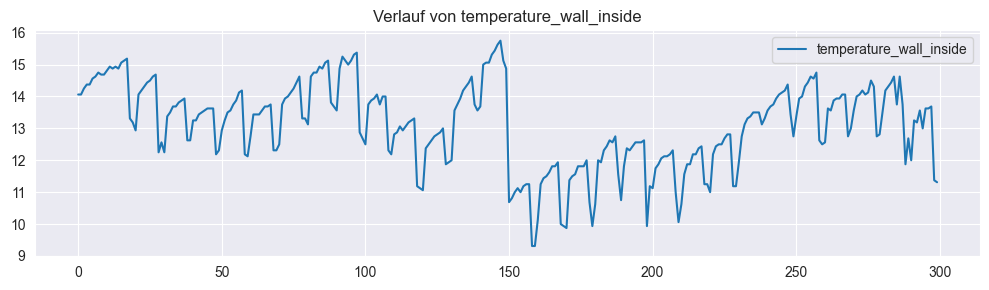

In [31]:
import matplotlib.pyplot as plt

for col in df.drop("state_air_quality", axis=1).columns:  # alle Sensor-Spalten außer Ziel
    plt.figure(figsize=(10,3))
    plt.plot(df[col].iloc[0:300], label=col)
    plt.title(f"Verlauf von {col}")
    plt.legend()
    plt.tight_layout()
    plt.show()


### Heatmap

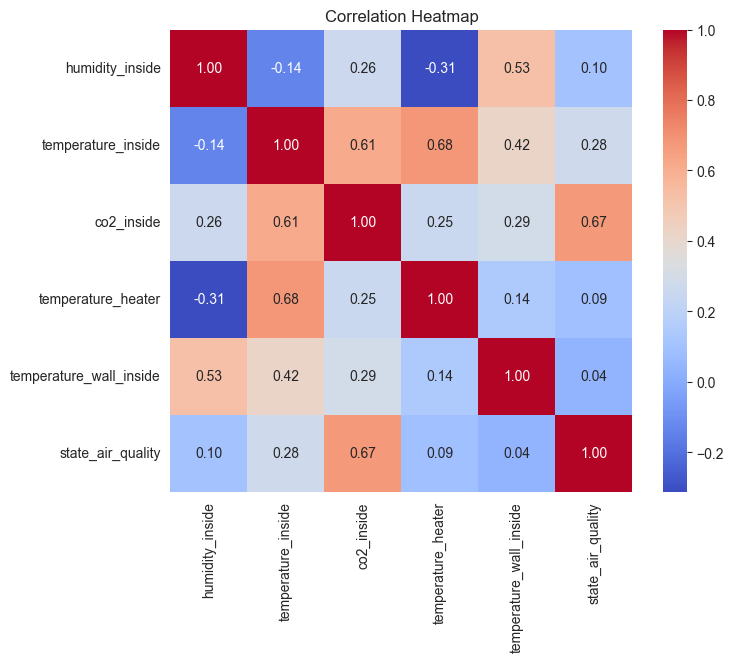

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()


### Scattermatrix

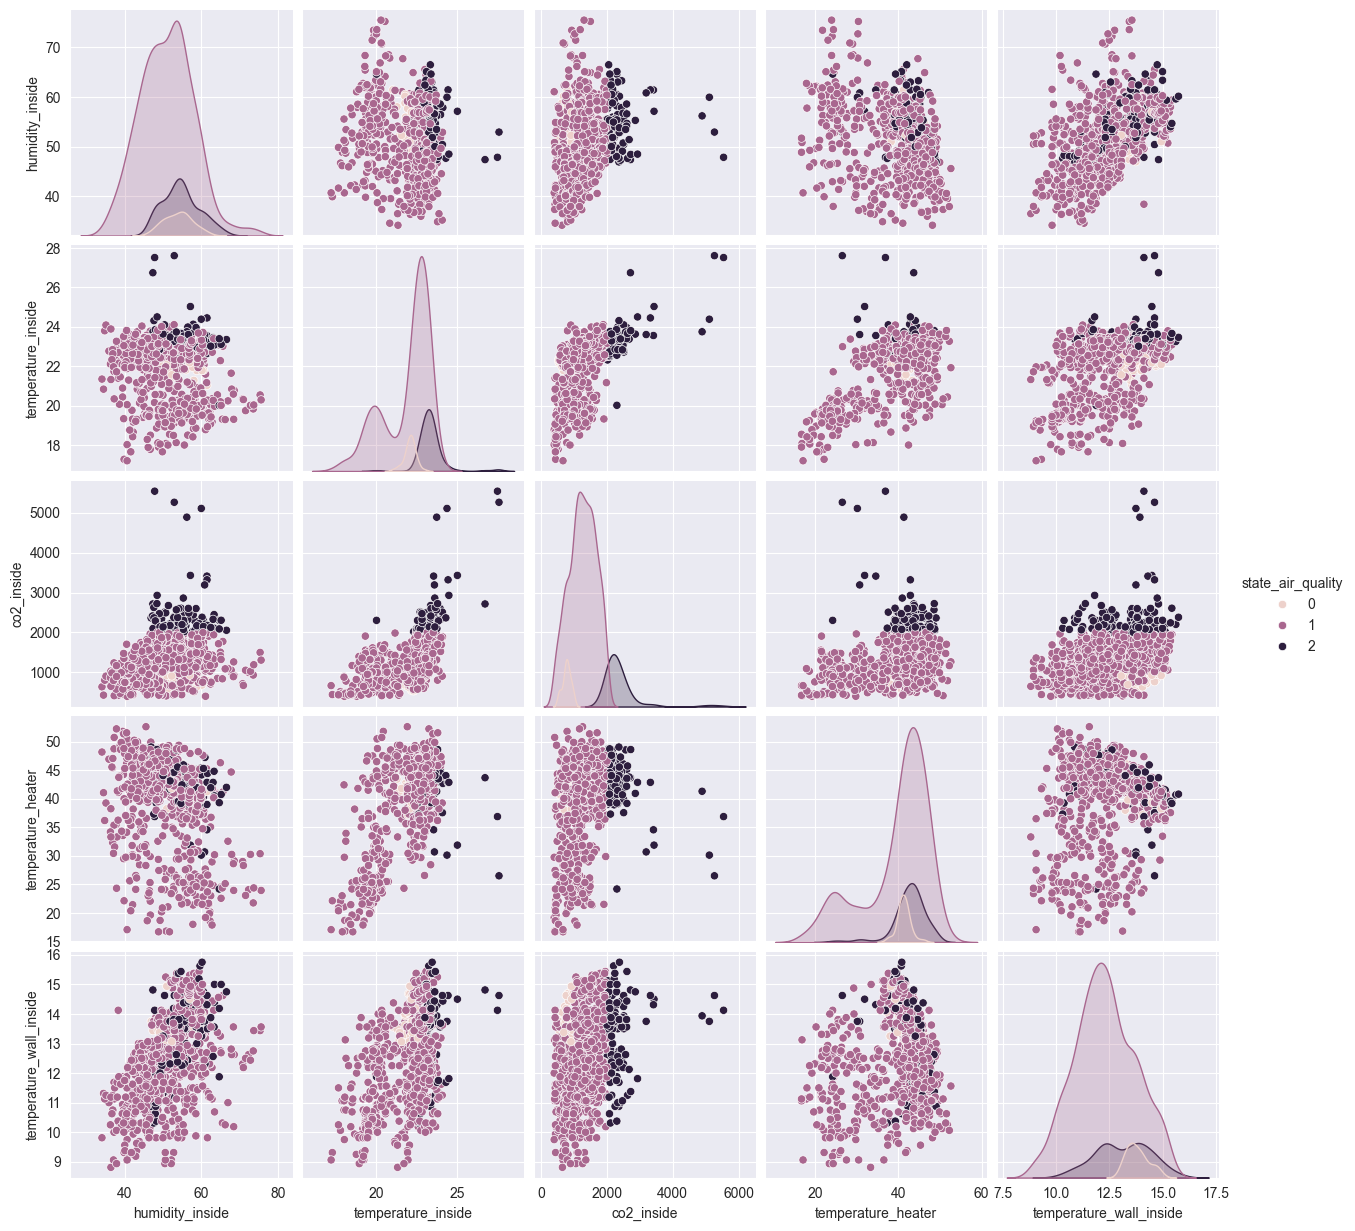

In [25]:
sns.pairplot(df, hue="state_air_quality")
plt.show()

## b)
### Train/Test Split

In [26]:
from sklearn.model_selection import train_test_split


X = df.drop("state_air_quality", axis=1)
Y = df["state_air_quality"]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, shuffle=True, random_state=23, stratify=Y
)

X_train.shape, X_test.shape


((732, 5), (184, 5))

## c)
### Normalisieren

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_norm = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_norm  = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print("Normalisierte Trainingsdaten:","\n",X_train_norm.head(), "\n")
print("Normalisierte Testdaten:","\n", X_test_norm.head())

Normalisierte Trainingsdaten: 
    humidity_inside  temperature_inside  co2_inside  temperature_heater  temperature_wall_inside
0         0.250302            0.628978    0.251779            0.868327                 0.522971
1         0.512684            0.498848    0.078737            0.667274                 0.733891
2         0.298140            0.238275    0.090747            0.877238                 0.238515
3         0.443585            0.593174    0.141014            0.604982                 0.871569
4         0.281711            0.667609    0.316281            0.738448                 0.385293 

Normalisierte Testdaten: 
    humidity_inside  temperature_inside  co2_inside  temperature_heater  temperature_wall_inside
0         0.619957            0.568677    0.240881            0.656598                 0.853222
1         0.091085            0.635364    0.171263            1.012470                 0.165125
2         0.582508            0.547111    0.289813            0.565836     

### Visualisierung

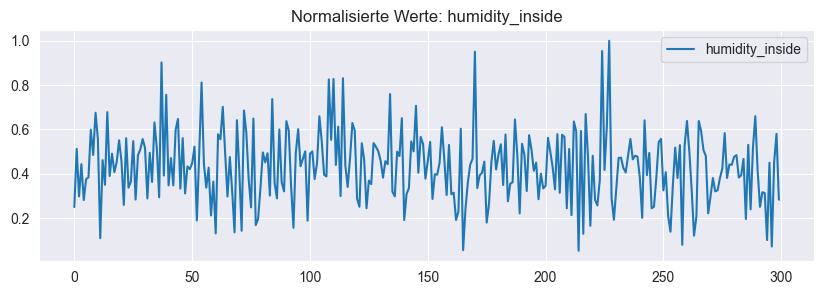

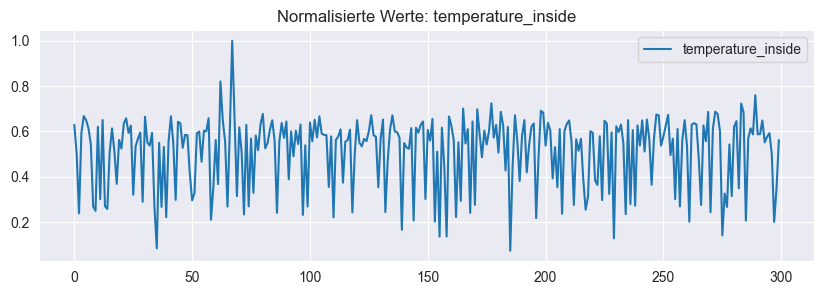

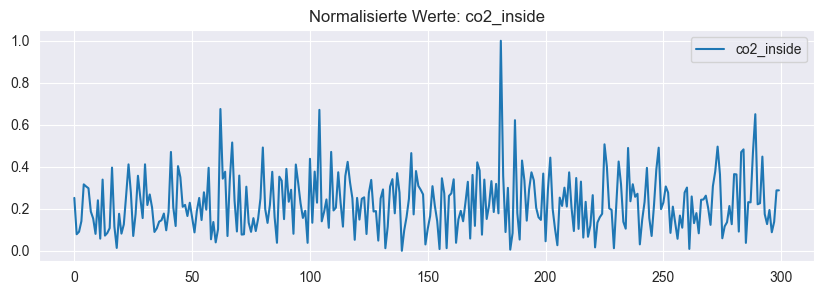

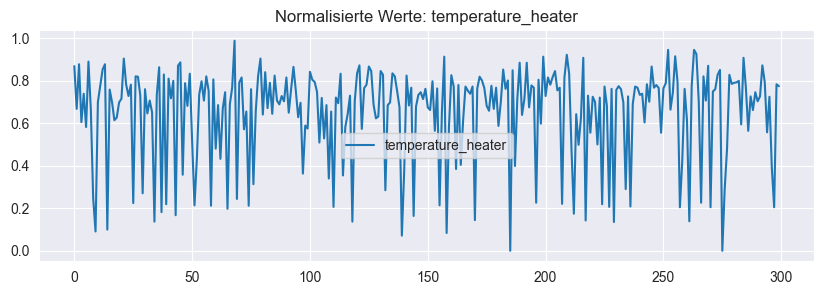

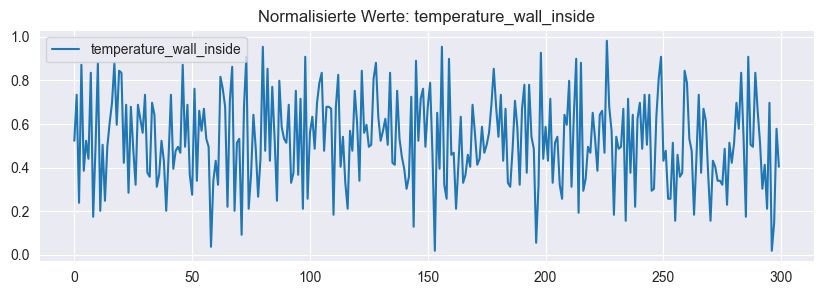

In [36]:
for col in X_train_norm.columns:
    plt.figure(figsize=(10,3))
    plt.plot(X_train_norm[col].iloc[0:300], label=col)
    plt.title(f"Normalisierte Werte: {col}")
    plt.legend()
    plt.show()


## d)
### MLPClassifer trainieren

In [29]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(30,20),    # Architektur des Netzes: 2 Hidden-Layer
    activation="relu",              # Aktivierungsfunktion für Neuronen
    solver="adam",                  # Optimierungsalgorithmus, der die Gewichte beim Training anpasst
    max_iter=1500,
    random_state=23
)

mlp.fit(X_train_norm, Y_train)

Y_pred = mlp.predict(X_test_norm)
Y_pred[:20]


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1])

## e)
### Accuracy Score

In [30]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test, Y_pred)
print("Accuracy:", acc)



Accuracy: 0.9836956521739131
